In [9]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sb 

from sklearn.preprocessing import StandardScaler 
from sklearn.preprocessing import LabelEncoder 

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA 

In [15]:
df = sb.load_dataset("iris") 
print(df.head()) 
print(df.info())

   sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB
None


In [16]:
Xdf = df.drop("species",axis=1)
Ydf = df["species"]

In [17]:
ss = StandardScaler() 
le = LabelEncoder() 
X = ss.fit_transform(Xdf)
Y = le.fit_transform(Ydf)

In [37]:
labels = np.unique(Y)
means = {} 
size = {}
d = X.shape[1] 
n = X.shape[0]
for l in labels:
    sum=np.zeros(d)
    ni=0
    for i in range(n):
        if( Y[i] == l):
            sum += X[i] 
            ni+=1
    means[l]= sum/ni 
    size[l]=ni
print(means)

{np.int64(0): array([-1.01457897,  0.85326268, -1.30498732, -1.25489349]), np.int64(1): array([ 0.11228223, -0.66143204,  0.28532388,  0.1667341 ]), np.int64(2): array([ 0.90229674, -0.19183064,  1.01966344,  1.08815939])}


In [38]:
# within class scatter 
SW = np.zeros((d,d))
for l in labels: 
    for i in range(n):
        if(Y[i]!=l):
            continue
        x=X[i]
        xd = (x-means[l]).reshape(-1,1)
        SW += xd @ xd.T


In [39]:
# between class scatter 
# bcs the data is standardised, mean of each feature is 0 
SB = np.zeros((d,d))
for l in labels: 
    md = means[l].reshape(-1,1)
    SB += size[l]*(md @ md.T)
print(SB)

[[ 92.80585961 -55.65287963 113.80442453 113.68762457]
 [-55.65287963  60.11742706 -74.89110136 -69.48896849]
 [113.80442453 -74.89110136 141.20575786 139.73748309]
 [113.68762457 -69.48896849 139.73748309 139.33243952]]


In [44]:
S = np.linalg.inv(SW)@SB 
eigValues,eigVectors = np.linalg.eig(S) 
pc = eigVectors[:,0:2]
print(pc)

[[-0.15128777  0.00693578]
 [-0.14733266  0.32786115]
 [ 0.85598541 -0.57170517]
 [ 0.47190474  0.75207191]]


<Axes: xlabel='x', ylabel='y'>

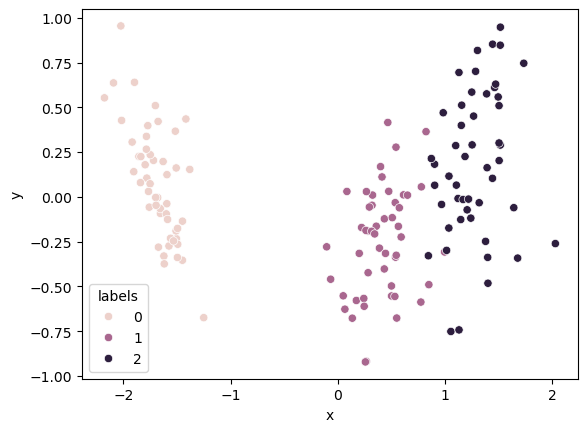

In [47]:
projX = X @ pc 
projDf = pd.DataFrame(projX, columns=["x","y"])
projDf["labels"]=Y 

sb.scatterplot(data=projDf, x="x", y="y", hue="labels")